In [50]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

from experiments_core import run_tests_splits
from experiments_core import run_one_experiment
from experiments_core import print_baseline_results
from experiments_core import default_tokenize
from experiments_core import tokenize_stems
from experiments_core import tokenize_lemmas
from experiments_core import tokenize_no_urls
from experiments_core import tokenize_norm_letters

from nltk.corpus import stopwords

%matplotlib inline

In [51]:
import importlib
import sys
importlib.reload(sys.modules[run_tests_splits.__module__])
importlib.reload(sys.modules[run_one_experiment.__module__])
importlib.reload(sys.modules[print_baseline_results.__module__])
importlib.reload(sys.modules[default_tokenize.__module__])
importlib.reload(sys.modules[tokenize_stems.__module__])
importlib.reload(sys.modules[tokenize_lemmas.__module__])
importlib.reload(sys.modules[tokenize_no_urls.__module__])
importlib.reload(sys.modules[tokenize_norm_letters.__module__])

<module 'experiments_core' from '/home/ctorres9/EAFIT/trabajogrado/experiments/experiments_core.py'>

In [3]:
file_path = 'data/TweetsPolaridadSEPLN.csv'
original_tweets_df = pd.read_csv(file_path, index_col=None, header=0, sep='\t')
print(original_tweets_df.describe())
print(original_tweets_df.head())

                      tweetid          user               content  \
count                   60798         60798                 60798   
unique                  60798           158                 60405   
top      179195261292261376,0  mariviromero  Buenos días a todos!   
freq                        1          7138                   111   

                       date   lang polarity  topic  
count                 60798  60798    60798  60798  
unique                60510      1        6     10  
top     2011-12-11T12:56:51     es     NONE  otros  
freq                      4  60798    21416  28189  
                 tweetid            user  \
0   142378325086715904,0     jesusmarana   
1   142379080808013824,0       EvaORegan   
2   142379173120442368,0  LosadaPescador   
3   142379815708803072,0    mgilguerrero   
4   142381190123499520,0  pedroj_ramirez   

                                             content                 date  \
0  Portada 'Público', viernes. Fabra al banquil

In [4]:
strong_negative_tweets = original_tweets_df[original_tweets_df.polarity == 'N+'][['content','polarity']]
standar_negative_tweets = original_tweets_df[original_tweets_df.polarity == 'N'][['content','polarity']]

strong_positive_tweets = original_tweets_df[original_tweets_df.polarity == 'P+'][['content','polarity']]
standar_positive_tweets = original_tweets_df[original_tweets_df.polarity == 'P'][['content','polarity']]

negative_tweets = pd.concat([strong_negative_tweets,standar_negative_tweets], ignore_index=True)
positive_tweets = pd.concat([strong_positive_tweets,standar_positive_tweets], ignore_index=True)

negative_tweets.polarity = "negative"
positive_tweets.polarity = "positive"

total_tweets = pd.concat([negative_tweets,positive_tweets], ignore_index=True)
print(total_tweets.describe())
print(total_tweets.head())

                                                  content  polarity
count                                               38077     38077
unique                                              37926         2
top     ¡Noticias descombacantes! está disponible! htt...  positive
freq                                                   63     22233
                                             content  polarity
0  Dado q la deuda privada es superior a la publi...  negative
1  TEPCO inyecta nitrógeno en los reactores de Fu...  negative
2  “@Declaracion: «Cualquier injusticia contra un...  negative
3  ¡Qué estrés!, la presidenta de la diputación d...  negative
4  Hoy entrego mi credencial en el Congreso. Una ...  negative


In [5]:
total_data_content = total_tweets.content
total_data_target = total_tweets.polarity

In [6]:
X_train, X_test, y_train, y_test = train_test_split(total_data_content, 
                                                    total_data_target, 
                                                    test_size=0.3, 
                                                    random_state=80)

In [7]:
print("Positivos entrenamiento:", len(y_train[y_train == 'positive']))
print("Negativos entrenamiento:", len(y_train[y_train == 'negative']))
print("Positivos pruebas:", len(y_test[y_test == 'positive']))
print("Negativos pruebas:", len(y_test[y_test == 'negative']))

Positivos entrenamiento: 15552
Negativos entrenamiento: 11101
Positivos pruebas: 6681
Negativos pruebas: 4743


# Experimentos con el clasificador SVM radial y el metodo de ponderacion TF (Term Frequency)
Los siguientes son los experimentos realizados para el clasificador SVM con kernel radial y con el metodo de ponderación para el modelo de espacio vectorial usando TF (Term Frequency)

# Linea base

In [8]:
tf_vect_baseline = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True)

In [9]:
parameters_svm_rbf = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}

In [10]:
%%time
tf_baseline_results = run_tests_splits(total_data_content, total_data_target, tf_vect_baseline, parameters_svm_rbf, SVC())

random state:  10
train time: 2280.627s
random state:  20
train time: 2258.630s
random state:  30
train time: 2170.245s
random state:  40
train time: 2223.516s
train time: 2517.422s
random state:  60
train time: 2169.165s
random state:  70
train time: 2162.865s
random state:  80
train time: 2130.998s
random state:  90
train time: 2188.825s
random state:  100
train time: 1709.727s
CPU times: user 1h 11min 20s, sys: 1min 32s, total: 1h 12min 53s
Wall time: 6h 9min 41s


Numero de caracteristicas:  (26653, 48372)

Best score selected:  0.9051889093160245
Best Accuracy:  0.9019607843137255
Best Best F1-score:  0.8989873981827634
Best random state:  30
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9051889093160245
C: 100
gamma: 0.001
kernel: 'rbf'


Exactitud: 0.9019607843137255
F1_score: 0.8989873981827634
Precision: 0.8997817833056683
Recall: 0.8982505169284718

             precision    recall  f1-score   support

   negative     0.8875    0.8759    0.8817      4763
   positive     0.9121    0.9206    0.9163      6661

avg / total     0.9018    0.9020    0.9019     11424

[[4172  591]
 [ 529 6132]]

Confusion matrix, without normalization
[[4172  591]
 [ 529 6132]]


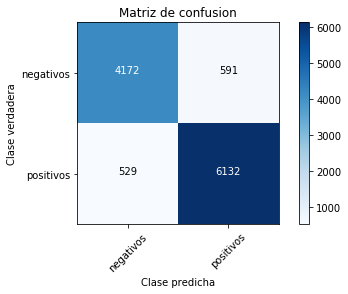

In [14]:
print_baseline_results(tf_baseline_results, parameters_svm_rbf)

In [54]:
all_experiments_results = []

## Prueba de la linea base con los parametros optimos
Esta prueba se hace para validar los resultados obtenidos anteriormente. Si esta bien debe dar lo mismo o un resultado muy similar dependiendo del clasificador.

Numero de caracteristicas:  (26653, 48372)

train time: 516.986s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9051889093160245
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.9019607843137255
F1_score: 0.8989873981827634
Precision: 0.8997817833056683
Recall: 0.8982505169284718

             precision    recall  f1-score   support

   negative     0.8875    0.8759    0.8817      4763
   positive     0.9121    0.9206    0.9163      6661

avg / total     0.9018    0.9020    0.9019     11424

[[4172  591]
 [ 529 6132]]

Confusion matrix, without normalization
[[4172  591]
 [ 529 6132]]
CPU times: user 4min 25s, sys: 3.53 s, total: 4min 28s
Wall time: 9min 17s


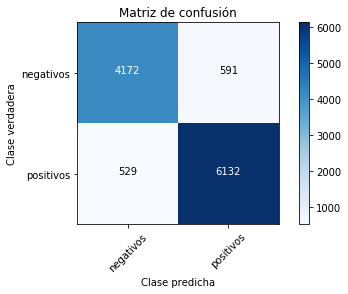

In [55]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_tf_vect_baseline = run_one_experiment(total_data_content, total_data_target, tf_vect_baseline, optimal_parameters, SVC(), 30)
all_experiments_results.append(clf_tf_vect_baseline)

## Experimento 1: Remocion de stop words

In [56]:
spanish_stopwords = stopwords.words('spanish')

In [57]:
tf_vect_stopwords = CountVectorizer(stop_words = spanish_stopwords,
                                    analyzer = 'word',
                                    tokenizer = default_tokenize,
                                    lowercase = True)

Numero de caracteristicas:  (26653, 48118)

train time: 370.369s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8904063332457884
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8920693277310925
F1_score: 0.8883354880822376
Precision: 0.891067113764895
Recall: 0.8861489488404006

             precision    recall  f1-score   support

   negative     0.8860    0.8505    0.8679      4763
   positive     0.8961    0.9218    0.9088      6661

avg / total     0.8919    0.8921    0.8917     11424

[[4051  712]
 [ 521 6140]]

Confusion matrix, without normalization
[[4051  712]
 [ 521 6140]]
CPU times: user 3min 14s, sys: 3.46 s, total: 3min 17s
Wall time: 6min 39s


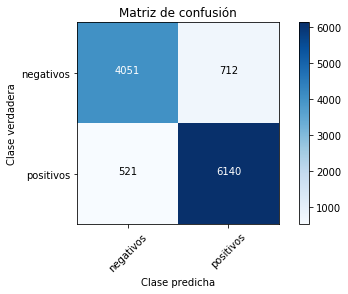

In [58]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_tf_vect_stopwords = run_one_experiment(total_data_content, total_data_target, tf_vect_stopwords, optimal_parameters, SVC(), 30)
all_experiments_results.append(clf_tf_vect_stopwords)

## Experimento 2: Stemming

In [59]:
#Prueba de los metodos anteriores
print(tokenize_stems(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaa', 'com', 'estas', 'estaa', 'cre', 'en', 'mi', 'si', 'llov', 'mañan', 'tu', 'cre', 'en', 'mi', 'cart', 'aeiou']


In [60]:
tf_vect_stemming = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True)

Numero de caracteristicas:  (26653, 32850)

train time: 365.445s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9086031591190485
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.906687675070028
F1_score: 0.9038278098245115
Precision: 0.9047716533643098
Recall: 0.9029620274861178

             precision    recall  f1-score   support

   negative     0.8941    0.8805    0.8872      4763
   positive     0.9155    0.9254    0.9204      6661

avg / total     0.9066    0.9067    0.9066     11424

[[4194  569]
 [ 497 6164]]

Confusion matrix, without normalization
[[4194  569]
 [ 497 6164]]
CPU times: user 3min 40s, sys: 3.11 s, total: 3min 43s
Wall time: 6min 50s


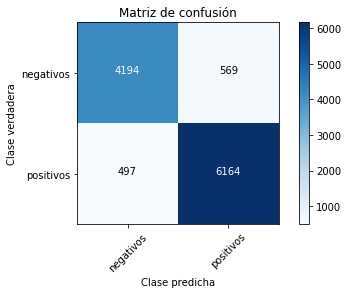

In [61]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_tf_vect_stemming = run_one_experiment(total_data_content, total_data_target, tf_vect_stemming, optimal_parameters, SVC(), 30)
all_experiments_results.append(clf_tf_vect_stemming)

## Experimento 3: Lematizacion

In [62]:
# Prueba del tokenizer
print(tokenize_lemmas(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaaa', 'comer', 'este', 'estaaaas', 'creer', 'en', 'mi', 'si', 'llover', 'mañana', 'tu', 'creer', 'en', 'mi', 'carta', 'aeiou']


In [63]:
tf_vect_lemmatize = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True)

Numero de caracteristicas:  (26653, 36771)

train time: 400.107s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9085656398904438
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.9047619047619048
F1_score: 0.9018734725203987
Precision: 0.9026734938525047
Recall: 0.9011311514850608

             precision    recall  f1-score   support

   negative     0.8909    0.8793    0.8850      4763
   positive     0.9145    0.9230    0.9187      6661

avg / total     0.9046    0.9048    0.9047     11424

[[4188  575]
 [ 513 6148]]

Confusion matrix, without normalization
[[4188  575]
 [ 513 6148]]
CPU times: user 3min 39s, sys: 3.21 s, total: 3min 43s
Wall time: 7min 14s


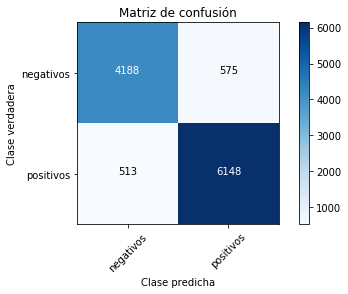

In [64]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_tf_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, tf_vect_lemmatize, optimal_parameters, SVC(), 30)
all_experiments_results.append(clf_tf_vect_lemmatize)

## Experimento 4: Remocion de URLs

In [65]:
# Prueba de la tokenizacion sin urls
print(tokenize_no_urls(
    "holaaaa cómo http://estas creerías https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python mi si lloviera \t  mañana, tu crees en mi cartas ¡¡ ¿¿. aeiou"))

['holaaaa', 'cómo', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [66]:
tf_vect_no_urls = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True)

Numero de caracteristicas:  (26653, 40441)

train time: 452.319s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9053014670018384
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.9032738095238095
F1_score: 0.9003556445744242
Precision: 0.9010843555198707
Recall: 0.899675594505172

             precision    recall  f1-score   support

   negative     0.8887    0.8780    0.8833      4763
   positive     0.9135    0.9213    0.9174      6661

avg / total     0.9031    0.9033    0.9032     11424

[[4182  581]
 [ 524 6137]]

Confusion matrix, without normalization
[[4182  581]
 [ 524 6137]]
CPU times: user 4min 36s, sys: 2.99 s, total: 4min 39s
Wall time: 8min 9s


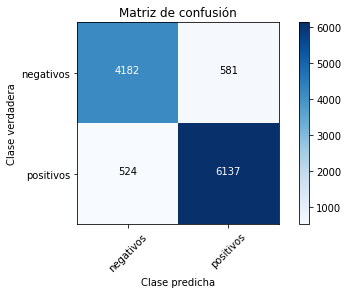

In [67]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_tf_vect_no_urls = run_one_experiment(total_data_content, total_data_target, tf_vect_no_urls, optimal_parameters, SVC(), 30)
all_experiments_results.append(clf_tf_vect_no_urls)

## Experimento 5: Remocion de letras repetidas

In [68]:
print(tokenize_norm_letters(
    "holaaaa cómo http://estas estaaaas creerías mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['hola', 'cómo', 'htp', 'estas', 'estas', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [69]:
tf_vect_norm_letters = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True)

Numero de caracteristicas:  (26653, 47582)

train time: 513.192s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9060518515739316
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.9028361344537815
F1_score: 0.8998644542692356
Precision: 0.9007712691639254
Recall: 0.8990310670221273

             precision    recall  f1-score   support

   negative     0.8892    0.8761    0.8826      4763
   positive     0.9123    0.9219    0.9171      6661

avg / total     0.9027    0.9028    0.9027     11424

[[4173  590]
 [ 520 6141]]

Confusion matrix, without normalization
[[4173  590]
 [ 520 6141]]
CPU times: user 5min 5s, sys: 3.7 s, total: 5min 9s
Wall time: 9min 18s


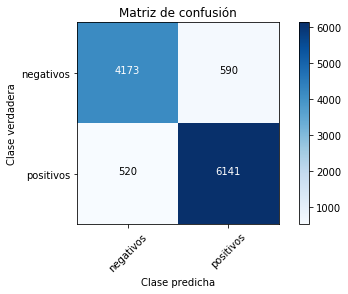

In [70]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_tf_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, tf_vect_norm_letters, optimal_parameters, SVC(), 30)
all_experiments_results.append(clf_tf_vect_norm_letters)

## Experimento 6: Remocion de terminos poco comunes (pruning < 10)

In [71]:
tf_vect_pruning10 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=10)

Numero de caracteristicas:  (26653, 4348)

train time: 203.594s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8970847559374179
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8952205882352942
F1_score: 0.8920394398473326
Precision: 0.8928337362512182
Recall: 0.8913040340010193

             precision    recall  f1-score   support

   negative     0.8794    0.8677    0.8735      4763
   positive     0.9063    0.9149    0.9106      6661

avg / total     0.8951    0.8952    0.8951     11424

[[4133  630]
 [ 567 6094]]

Confusion matrix, without normalization
[[4133  630]
 [ 567 6094]]
CPU times: user 1min 43s, sys: 2.16 s, total: 1min 45s
Wall time: 3min 48s


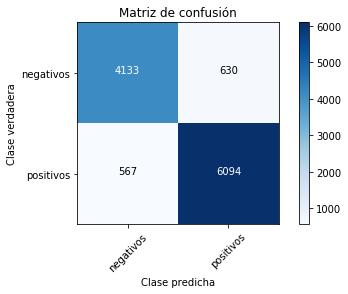

In [72]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_tf_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, tf_vect_pruning10, optimal_parameters, SVC(), 30)
all_experiments_results.append(clf_tf_vect_pruning10)

## Experimento 7: Remocion de terminos poco comunes (pruning < 5)

In [73]:
tf_vect_pruning5 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=5)

Numero de caracteristicas:  (26653, 7854)

train time: 262.090s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9027126402281169
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8974964985994398
F1_score: 0.8943318833484057
Precision: 0.8953514964764195
Recall: 0.8934052531676909

             precision    recall  f1-score   support

   negative     0.8834    0.8688    0.8760      4763
   positive     0.9073    0.9180    0.9126      6661

avg / total     0.8973    0.8975    0.8974     11424

[[4138  625]
 [ 546 6115]]

Confusion matrix, without normalization
[[4138  625]
 [ 546 6115]]
CPU times: user 2min 19s, sys: 1.78 s, total: 2min 21s
Wall time: 4min 47s


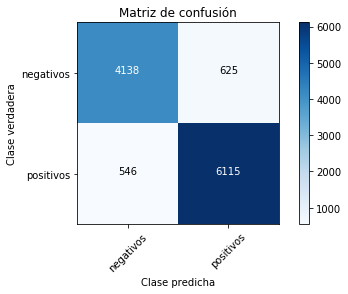

In [74]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_tf_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, tf_vect_pruning5, optimal_parameters, SVC(), 30)
all_experiments_results.append(clf_tf_vect_pruning5)

In [75]:
len(all_experiments_results)

8

In [76]:
import xlsxwriter

In [77]:
# Create a workbook and add a worksheet.
# workbook = xlsxwriter.Workbook('result_es_twitter_sa_svm_rbf_tf.xlsx')
# worksheet = workbook.add_worksheet()
# row = 0
# col = 0
# for exp in all_experiments_results:
#     worksheet.write(row, col, exp[0])
#     row += 1
#     worksheet.write(row, col, exp[1])
#     row += 1
#     worksheet.write(row, col, exp[2])
#     row += 1
#     worksheet.write(row, col, exp[3])
#     row += 1
#     worksheet.write(row, col, exp[4])
#     row += 1
#     worksheet.write(row, col, exp[5])
#     row += 1
#     worksheet.write(row, col, exp[6])
#     row += 1
#     worksheet.write(row, col, exp[7])
#     row += 1
#     worksheet.write(row, col, exp[8])
#     row += 1
#     row = 0
#     col += 1
# workbook.close()